# Linear Regression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = [round(np.random.uniform(-10, 10), 2) for _ in range(100)]
y = [X[i]*(5+round(np.random.uniform(-3, 3), 2))+ round(np.random.uniform(-10, 10), 2) for i in range(100)]

In [5]:
data = pd.DataFrame(np.array([X,y])).T
data.columns = ['X', 'y']

In [35]:
data

,X,y
0,-1.09,7.5002
1,-4.57,-19.4026
2,8.30,60.1270
3,5.51,31.4682
4,6.92,39.2812
5,-0.41,8.1891
6,-3.07,-27.3131
7,7.78,22.6150
8,7.73,34.4387
9,4.79,18.2488


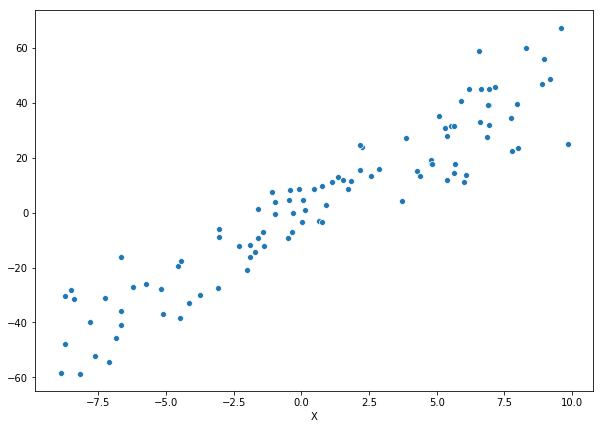

In [36]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='X', y=y, data=data)

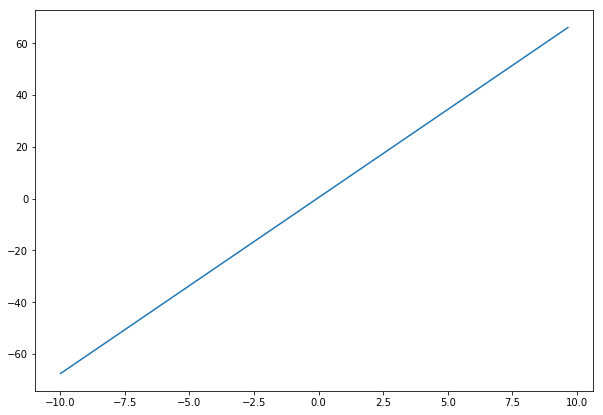

In [100]:
# Draw a line y = ax + b
a = round(np.random.uniform(-10,10), 2)
b = round(np.random.uniform(-10,10), 2)
def lin(x,a,b):
    return np.dot(x,a) + b

plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b))

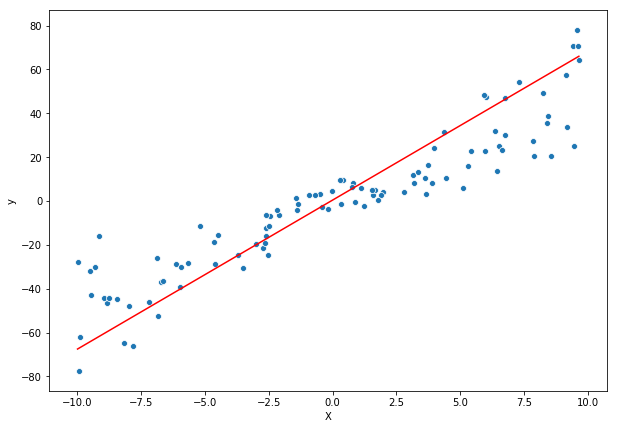

In [101]:
plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b),color="red")
sns.scatterplot(x='X', y='y', data=data)

In [102]:
a_1 = sum(np.array(np.array(X)-np.mean(data.X)) * np.array(np.array(y)-np.mean(data.y))) / sum(np.array(np.array(X)-np.mean(data.X)) * np.array(np.array(X)-np.mean(data.X)))
b_1 = np.mean(data.y) - a * np.mean(data.X)

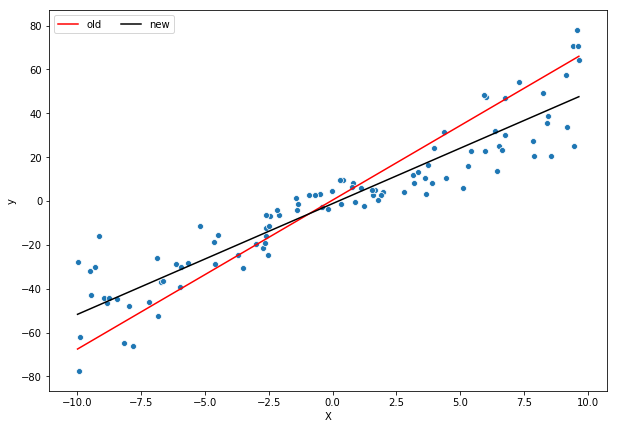

In [110]:
plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b),color="red")
sns.lineplot(X,lin(X, a_1, b_1),color="black")
sns.scatterplot(x='X', y='y', data=data)
plt.legend(['old','new'], ncol=2, loc='upper left')

### Gradient descent

In [24]:
def gradient(data, a, b):
    D_a = (-1/data.shape[0]) * sum(np.multiply(np.array(data['y']-np.array([b]*data.shape[0])-a*np.array(data['X'])),data['X']))
    D_b = (-1/data.shape[0]) * sum(np.array(data['y']-np.array([b]*data.shape[0])-a*np.array(data['X'])))
    return D_a, D_b
                        

In [29]:
EPOCHS = 1000
lr = 0.1
(a, b) = (1, 1)
for _ in range(EPOCHS):
    print(a,b)
    a, b = a - lr*gradient(data, a, b)[0], b - lr*gradient(data, a, b)[1]

print(round(a, 2),round(b, 2))

1 1
12.820363767000003 1.2382601
-9.09566688238813 0.41593008399643006
31.572029515485198 1.5980881178510504
-43.861371027231755 -0.9049333027372621
96.08519931839517 3.4586109803349587
-163.52379216765286 -4.888912849914979
318.08810104480835 10.36862034610135
-575.3509722239895 -18.141778931148934
1082.0875087550057 34.56240283573209
-1992.6467601740715 -63.377762740742696
3711.3448844475843 118.16103096819944
-6870.2133686883135 -218.75116184351822
12759.801986022474 406.1363390084859
-23656.13779156273 -753.2135569863942
43899.635246044905 1397.4136145102132
-81424.11519908486 -2592.3387842714073
151065.90391196145 4809.030208367463
-280229.90308121534 -8921.437274487424
519873.5824483087 16550.09722231472
-964410.6944792593 -30702.598446357915
1789107.8925775732 56956.54938115378
-3318986.7763631134 -105661.33284484036
6157118.190352619 196013.55656455236
-11422149.842069764 -363628.209597631
21189420.594787855 674571.7999801704
-39308805.1755207 -1251409.03441659
72922383.7068220

-4.554591038189189e+59 -1.449968968114977e+58
8.449291868910149e+59 2.689859728292257e+58
-1.5674411267101295e+60 -4.990000142758061e+58
2.9077841360204135e+60 9.257025993892286e+58
-5.394275062463399e+60 -1.7172851262531973e+59
1.0007002613797265e+61 3.1857620436587725e+59
-1.8564144422181992e+61 -5.909956153268687e+59
3.443862977036418e+61 1.0963650534754015e+60
-6.388763163483361e+61 -2.0338836690307803e+60
1.1851892781810378e+62 3.773088868563554e+60
-2.198662854093679e+62 -6.999515177218687e+60
4.0787732685115927e+62 1.298490823375885e+61
-7.566595007938357e+62 -2.4088502927732232e+61
1.4036906747466813e+63 4.468695217966835e+61
-2.604008154663545e+63 -8.289945212032996e+61
4.8307355684171316e+63 1.5378804833724258e+62
-8.961571833090343e+63 -2.852945732023481e+62
1.6624749705758175e+64 5.292543495982406e+62
-3.0840828810697353e+64 -9.818278820536338e+62
5.721329575273514e+64 1.8214040011379954e+63
-1.0613726469486307e+65 -3.378914569448204e+63
1.9689687176199562e+65 6.26827637388

2.2813835357819968e+117 7.262859175535295e+115
-4.2322296770715317e+117 -1.3473441734362136e+116
7.851274351090345e+117 2.499478893666848e+116
-1.4565019774338515e+118 -4.6368217290411824e+116
2.7019792143349444e+118 8.601839287935251e+116
-5.012483187671918e+118 -1.595740432979007e+117
9.298734636223993e+118 2.960282614225935e+117
-1.725022560625717e+119 -5.491665796628722e+117
3.2001158771383886e+119 1.0187673662282322e+118
-5.936584170469388e+119 -1.8899310062326727e+118
1.1013048578910459e+120 3.506040070309295e+118
-2.0430475761594678e+120 -6.504108845283998e+118
3.7900889735873884e+120 1.206587232973909e+119
-7.031052333451623e+120 -2.2383585290569823e+119
1.3043413297219706e+121 4.152413325519138e+119
-2.419703657056536e+121 -7.703205810024173e+119
4.488829460936274e+121 1.429033554702112e+120
-8.327296555761099e+121 -2.651022120955306e+120
1.5448095885809627e+122 4.9179519001982893e+120
-2.8658000216416763e+122 -9.123368191265171e+120
5.316389686307942e+122 1.69249006176805e+12

-3.3205144031541327e+174 -1.0570966311536326e+173
6.159937327396964e+174 1.9610362149682204e+173
-1.1427394454731151e+175 -3.637948436388479e+173
2.119913516704598e+175 6.748814083495073e+173
-3.932684161826796e+175 -1.251982877987047e+174
7.295582859778737e+175 2.32257268814994e+174
-1.3534147944179975e+176 -4.308640306976985e+174
2.510740595995457e+176 7.993024885560975e+174
-4.657713486197277e+176 -1.482798337047128e+175
8.640595907878985e+176 2.7507619954012158e+175
-1.6029302331391375e+177 -5.102980874939563e+175
2.97362052305742e+177 9.466618287417758e+175
-5.516409156393241e+177 -1.756166914906066e+176
1.0233575449449352e+178 3.2578922476570515e+176
-1.8984463173512123e+178 -6.043766003820685e+176
3.521836954901534e+178 1.1211883246048864e+177
-6.533413888792883e+178 -2.079933700999737e+177
1.2120236566563364e+179 3.8585169909604726e+177
-2.2484437222237715e+179 -7.157994200668304e+177
4.171122522438483e+179 1.3278905107023223e+178
-7.737913528912437e+179 -2.4633901047987034e+17

-1.0618595069765896e+233 -3.380464504286343e+231
1.9698718991440578e+233 6.271151681833963e+231
-3.6543396499655476e+233 -1.1633709913741956e+232
6.77922167584244e+233 2.1581874147480057e+232
-1.2576238371998422e+234 -4.0036866586081996e+232
2.3330373183241732e+234 7.427300683332438e+232
-4.328053403323268e+234 -1.3778499704022123e+233
8.029038419099706e+234 2.5560706666928496e+233
-1.489479263030344e+235 -4.74180599736879e+233
2.763155883922375e+235 8.796597218407238e+233
-5.1259729681106e+235 -1.6318702761316648e+234
9.50927127299878e+235 3.0273076418113082e+234
-1.7640795358468374e+236 -5.616004955917049e+234
3.27257107243321e+236 1.0418337148587271e+235
-6.07099691737284e+236 -1.932721744258314e+235
1.1262399732497397e+237 3.585421826395235e+235
-2.089305092077807e+237 -6.651371161617759e+235
3.8759020026492065e+237 1.2339060917158458e+236
-7.190245403173825e+237 -2.2890381639793574e+236
1.3338734808703972e+238 4.246429895542337e+236
-2.4744892047550257e+238 -7.877617394726154e+236

In [30]:
def lin(x,a,b):
    return np.dot(x,a) + b

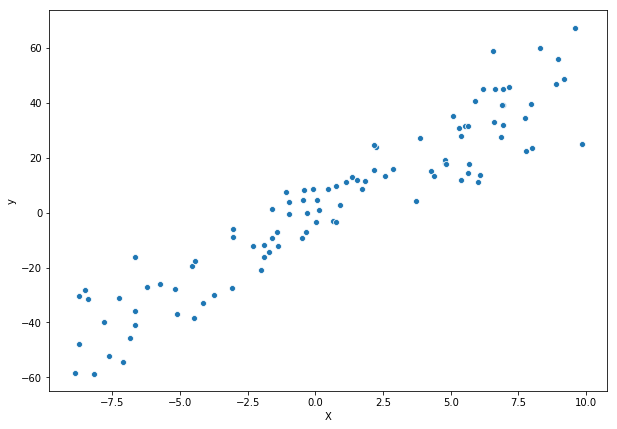

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='X', y='y', data=data)

In [33]:
import seaborn as sns